# AD GWAS loci harmonization and refinement
Author: Anqi Wang and Jenny Empawi

## Motivation

## Methods Overview

## Main Conclusions

## Implementation

## Expected outcome

This analysis will generate an Upset plot that displays intersection patterns from fine-mapping results across different Alzheimer's disease meta-analysis GWAS cohorts. The visualization will help identify cross-cohort consistencies and differences by showing which fine-mapped variants are shared between cohorts and which are unique to specific studies, providing insights into the reproducibility and robustness of fine-mapping signals across different AD GWAS datasets.

## AD GWAS fine-mapping with RSS QC approach

## Post-QC AD GWAS colocalization

### Load libraries

In [10]:
library(data.table)
library(dplyr)
library("UpSetR")

In [7]:
#test <- fread("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/variant_gene_summary/AD_loci_summary/AD_colocalization/ad_meta_colocboost_export_filtered.bed.gz") # path in BU cluster
#test_2<- fread("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/variant_gene_summary/AD_loci_summary/AD_xQTL_colocalization/AD_xQTL_ROSMAP_colocboost_export_release.bed.gz") # path in BU cluster

setwd("/data/analysis_result/ColocBoost/export/summary/")
test <- fread("ad_meta_colocboost_export_filtered.bed.gz") # path in cloud
test_2<- fread("AD_xQTL_ROSMAP_colocboost_export_release_sorted.bed.gz") # path in cloud
head(test_2)

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,cos_npc,min_npc_outcome,coef
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
chr1,23939236,23939236,T,C,chr1:23939236:C:T,ENSG00000142798,DLPFC_Klein_gpQTL_adjusted_gp_5187; DLPFC_Klein_gpQTL_unadjusted_gp_5187; PCC_lf2_sQTL_chr1:21836967:21838824:clu_7031_-:PR:ENSG00000142798; AD_Bellenguez,ENSG00000142798:cos34:y68_y116_y141_y160,0.08315149,0.9492,0.5131,-0.0136179776041107;-0.0303383554994656;0.00094832112820681;-0.000388058713367444
chr1,23941815,23941815,A,T,chr1:23941815:T:A,ENSG00000142798,DLPFC_Klein_gpQTL_adjusted_gp_5187; DLPFC_Klein_gpQTL_unadjusted_gp_5187; PCC_lf2_sQTL_chr1:21836967:21838824:clu_7031_-:PR:ENSG00000142798; AD_Bellenguez,ENSG00000142798:cos34:y68_y116_y141_y160,0.01587636,0.9492,0.5131,-0.00337772031776473;-0.00147831623403304;0.000973440803803391;2.52404586941517e-05
chr1,23942443,23942443,T,C,chr1:23942443:C:T,ENSG00000142798,DLPFC_Klein_gpQTL_adjusted_gp_5187; DLPFC_Klein_gpQTL_unadjusted_gp_5187; PCC_lf2_sQTL_chr1:21836967:21838824:clu_7031_-:PR:ENSG00000142798; AD_Bellenguez,ENSG00000142798:cos34:y68_y116_y141_y160,0.02032322,0.9492,0.5131,-0.00337772031776473;-0.00147831623403304;0.000991257950277743;-0.000250043680882723
chr1,23948943,23948943,G,A,chr1:23948943:A:G,ENSG00000142798,DLPFC_Klein_gpQTL_adjusted_gp_5187; DLPFC_Klein_gpQTL_unadjusted_gp_5187; PCC_lf2_sQTL_chr1:21836967:21838824:clu_7031_-:PR:ENSG00000142798; AD_Bellenguez,ENSG00000142798:cos34:y68_y116_y141_y160,0.02065015,0.9492,0.5131,-0.00337772031776473;-0.00147831623403304;0.000973440803803391;-0.000266345808033384
chr1,23951583,23951583,T,C,chr1:23951583:C:T,ENSG00000142798,DLPFC_Klein_gpQTL_adjusted_gp_5187; DLPFC_Klein_gpQTL_unadjusted_gp_5187; PCC_lf2_sQTL_chr1:21836967:21838824:clu_7031_-:PR:ENSG00000142798; AD_Bellenguez,ENSG00000142798:cos34:y68_y116_y141_y160,0.02169580,0.9492,0.5131,0.00317916789672049;0.00240400386372209;-0.000998239726632306;0.000119263470823021
chr1,23952137,23952137,A,G,chr1:23952137:G:A,ENSG00000142798,DLPFC_Klein_gpQTL_adjusted_gp_5187; DLPFC_Klein_gpQTL_unadjusted_gp_5187; PCC_lf2_sQTL_chr1:21836967:21838824:clu_7031_-:PR:ENSG00000142798; AD_Bellenguez,ENSG00000142798:cos34:y68_y116_y141_y160,0.02190212,0.9492,0.5131,0.00317916789672049;0.00240400386372209;-0.000998239726632306;0.000128249796951603


In [8]:
head(test)

#chr,start,end,a1,a2,variant_ID,region_ID,event_ID,cos_ID,vcp,cos_npc,min_npc_outcome,coef
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,23939235,23939236,C,T,chr1:23939236:C:T,chr1:22020160-24199848,AD_Bellenguez; AD_Bellenguez_EADB,chr1:22020160-24199848:cos1:y1_y5,0.009423266,0.9999,0.9999,-9.33144593788376e-05;-9.33732470467965e-05
1,23941814,23941815,T,A,chr1:23941815:T:A,chr1:22020160-24199848,AD_Bellenguez; AD_Bellenguez_EADB,chr1:22020160-24199848:cos1:y1_y5,0.004556265,0.9999,0.9999,-7.67268814921634e-05;-4.30956892439607e-05
1,23942442,23942443,C,T,chr1:23942443:C:T,chr1:22020160-24199848,AD_Bellenguez; AD_Bellenguez_EADB,chr1:22020160-24199848:cos1:y1_y5,0.012603259,0.9999,0.9999,-0.000134082971001403;-9.57575373877769e-05
1,23948942,23948943,A,G,chr1:23948943:A:G,chr1:22020160-24199848,AD_Bellenguez; AD_Bellenguez_EADB,chr1:22020160-24199848:cos1:y1_y5,0.009613106,0.9999,0.9999,-0.000163522936066123;-5.47195358475532e-05
1,23949721,23949722,C,T,chr1:23949722:C:T,chr1:22020160-24199848,AD_Bellenguez; AD_Bellenguez_EADB,chr1:22020160-24199848:cos1:y1_y5,0.003533767,0.9999,0.9999,6.70373408918558e-05;3.51482115108588e-05
1,23951582,23951583,C,T,chr1:23951583:C:T,chr1:22020160-24199848,AD_Bellenguez; AD_Bellenguez_EADB,chr1:22020160-24199848:cos1:y1_y5,0.009004764,0.9999,0.9999,0.000119714084320035;6.85047406745679e-05


In [11]:
#s2g <- data.table::fread("/restricted/projectnb/xqtl/jaempawi/xqtl/Staging/variant_gene_summary/AD_loci_summary/AD_colocalization/ad_meta_colocboost_export_filtered.bed.gz") # path in BU cluster
s2g <- data.table::fread("ad_meta_colocboost_export_filtered.bed.gz") # path in cloud
cohorts <- c("AD_Bellenguez", "AD_Wightman_Excluding23andMe_2021", "AD_Wightman_ExcludingUKBand23andME_2021",
             "AD_Kunkle_Stage1_2019", "AD_Wightman_Full_2021", "AD_Bellenguez_EADB")
coloc <- vector("list", length(cohorts)) %>% setNames(cohorts)
for (i in 1:nrow(s2g)){
    traits <- s2g$event_ID[i]
    for (con in cohorts){
        if_coloc <- grepl(con, traits)
        if (if_coloc){
            coloc[[con]] <- c(coloc[[con]], s2g$cos_ID[i])
        }
    }
}
coloc <- lapply(coloc, unique)
sapply(coloc, length)
max_size <- max(sapply(coloc, length))

AD_Bellenguez       AD_Wightman_Excluding23andMe_2021 
                                     63                                      46 
AD_Wightman_ExcludingUKBand23andME_2021                   AD_Kunkle_Stage1_2019 
                                     33                                      23 
                  AD_Wightman_Full_2021                      AD_Bellenguez_EADB 
                                     44                                      35

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.
ℹ The deprecated feature was likely used in the UpSetR package.
  Please report the issue to the authors.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.
ℹ The deprecated feature was likely used in the UpSetR package.
  Please report the issue to the authors.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.
ℹ The deprecated feature was likely used in the UpSetR package.
  Please report the issue to the authors.”


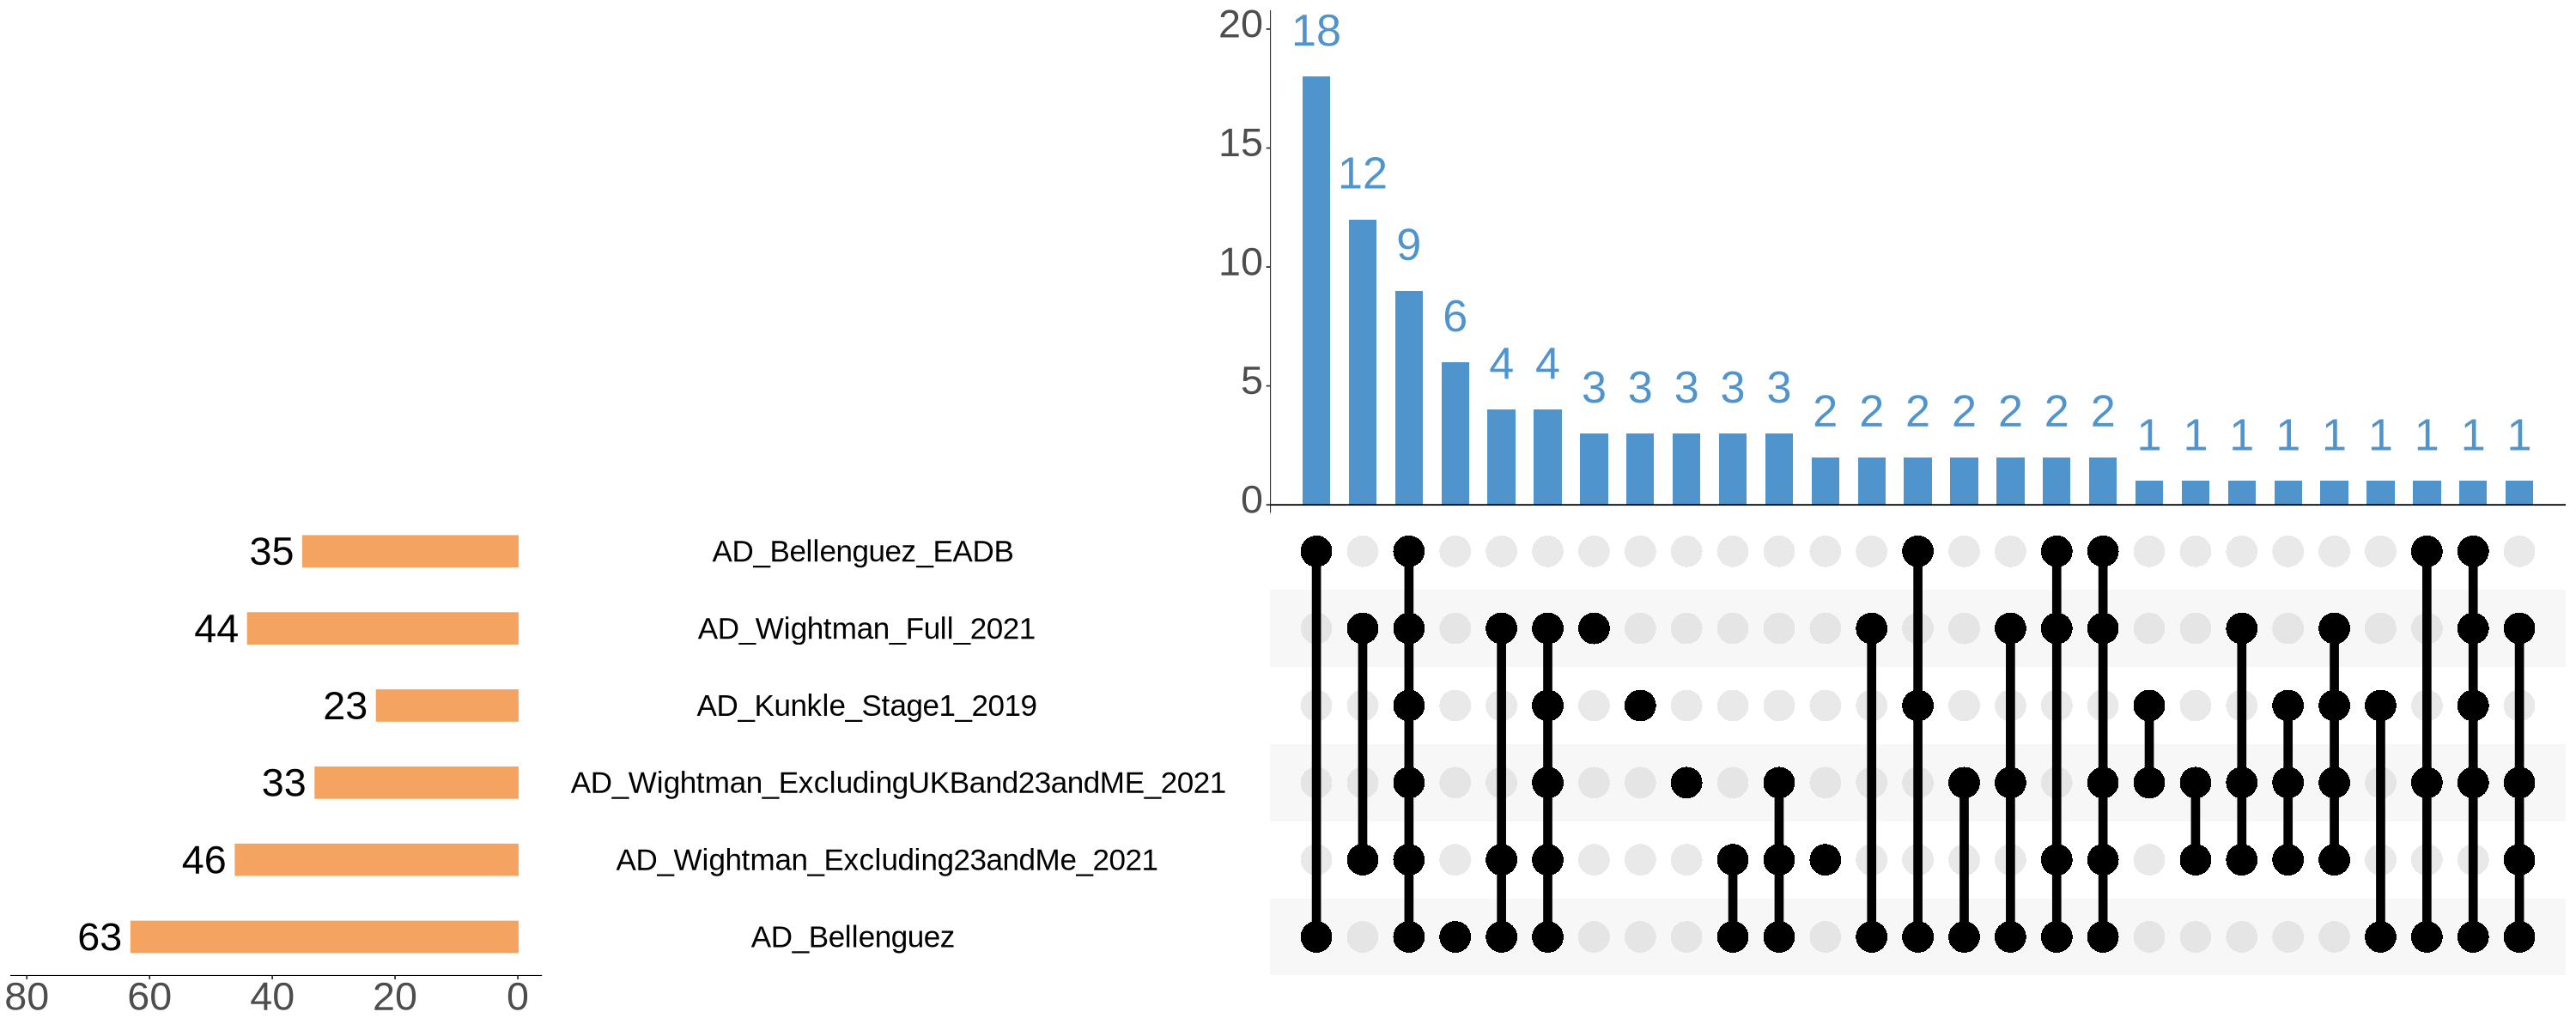

In [12]:
#pdf("AD_GWAS_loci_cs_coloboost_0504.pdf", width = 25, height = 12)
options(repr.plot.width = 25, repr.plot.height = 10)
p1 <- upset(fromList(coloc), 
            order.by = "freq", 
            keep.order = T,
            main.bar.color = "steelblue3", 
            sets.bar.color = "sandybrown", 
            text.scale = c(5, 4, 4, 4, 3, 5), # Adjust font sizes for the main title, set names, set sizes, intersection sizes, and axis titles
            matrix.color = "black", # Adjust the color of matrix dots
            number.angles = 0, # Adjust the angle of number labels, useful for some plots
            mb.ratio = c(0.5, 0.5), # Adjust the ratio of main bar and sets bar
            point.size = 10, line.size = 3,
            sets = cohorts,  
            nsets = length(coloc),
            set_size.show = TRUE,
            set_size.angles = 0,
            set_size.numbers_size = 7,
            set_size.scale_max = max_size + 0.25*max_size,
            nintersects = 100,
            mainbar.y.label = "",
            sets.x.label = NULL)
#dev.off()
p1